# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Bryan Raihan 'Ilman
- **Email:** bryan.raihan@ui.ac.id
- **ID Dicoding:** bryan_ilman

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda per bulan selama tahun 2011 dan 2012?
- Berapakah jumlah penyewaan sepeda pada hari kerja dan hari libur?
- Pada jam berapa sepeda paling banyak disewa (kolom ‘hr’)?

## Import Semua Packages/Library yang Digunakan

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [14]:
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

In [15]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Missing value

Tidak ditemukan _missing value_ sama sekali pada `day.csv` dan `hour.csv`.

In [17]:
print('The overall count of missing values for each column in the "day" dataframe:')
print(df_day.isna().sum())

The overall count of missing values for each column in the "day" dataframe:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [18]:
print('The overall count of missing values for each column in the "hour" dataframe:')
print(df_hour.isna().sum())

The overall count of missing values for each column in the "hour" dataframe:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- Duplicate data

Tidak ditemukan _duplicate value_ sama sekali pada `day.csv` dan `hour.csv`.

In [19]:
print('The overall count of duplicate entries in the "day" dataframe:', df_day.duplicated().sum())
print('The overall count of duplicate entries in the "hour" dataframe:', df_hour.duplicated().sum())

The overall count of duplicate entries in the "day" dataframe: 0
The overall count of duplicate entries in the "hour" dataframe: 0


- Invalid value

Sebuah hari dapat menjadi _working day_ atau _holiday_, tetapi tidak dapat menjadi keduanya sekaligus atau tidak keduanya sekaligus. Entri yang demikian perlu dihapus.

In [20]:
df_day = df_day[df_day['holiday'] != df_day['workingday']]
df_hour = df_hour[df_hour['holiday'] != df_hour['workingday']]

### Cleaning Data

- Remove ID

ID tidak relevan dalam analisis data sehingga perlu dibuang.

In [21]:
df_day.drop('instant', axis=1, inplace=True)
df_hour.drop('instant', axis=1, inplace=True)

- Fix data type

In [22]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

## Exploratory Data Analysis (EDA)

### Explore ...

Beberapa informasi penting yang dapat diperoleh dari `day.csv` adalah sebagai berikut. Pertama, rata-rata pengguna _bike sharing_ harian adalah 4550, dimana sebagian besar (3925) adalah _registered user_, dan sisanya (625) adalah _casual user_. Selama tahun 2011 dan 2012, kondisi cuaca rata-ratanya cerah, dengan suhu rata-rata sedang.

In [23]:
df_day.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,521,521.000000,521.00000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,2012-01-01 04:50:12.667946496,2.502879,0.50096,6.522073,0.040307,2.996161,0.959693,1.412668,0.500444,0.478657,0.629621,0.189651,625.036468,3925.529750,4550.566219
min,2011-01-03 00:00:00,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.097391,0.117930,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-04 00:00:00,2.000000,0.00000,4.000000,0.000000,2.000000,1.000000,1.000000,0.341667,0.339004,0.531250,0.134337,253.000000,2914.000000,3272.000000
50%,2012-01-02 00:00:00,3.000000,1.00000,7.000000,0.000000,3.000000,1.000000,1.000000,0.512500,0.497463,0.630833,0.178479,620.000000,3848.000000,4575.000000
75%,2012-07-02 00:00:00,3.000000,1.00000,10.000000,0.000000,4.000000,1.000000,2.000000,0.655000,0.607962,0.729167,0.234471,884.000000,5146.000000,5992.000000
max,2012-12-31 00:00:00,4.000000,1.00000,12.000000,1.000000,5.000000,1.000000,3.000000,0.848333,0.840896,0.972500,0.441563,3065.000000,6946.000000,8362.000000
std,NaN,1.107879,0.50048,3.442940,0.196868,1.416925,0.196868,0.551704,0.181718,0.161419,0.140250,0.077257,428.559901,1585.382716,1893.171210


Korelasi antara 'cnt' dan 'registered' hampir positif sempurna, yang berarti kenaikan dalam 'registered' sangat erat terkait dengan kenaikan dalam 'cnt'. Selain itu, 'temp' dan 'cnt' juga memiliki korelasi yang kuat, menunjukkan bahwa lebih banyak orang cenderung menggunakan layanan bike sharing ketika suhu meningkat.

In [24]:
df_day.corr(numeric_only=True)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.000872,0.836019,-0.013759,-0.002443,0.013759,0.034235,0.340146,0.345879,0.216763,-0.233897,0.248301,0.415285,0.403977
yr,-0.000872,1.000000,-0.005872,0.009366,-0.002707,-0.009366,-0.088496,0.048583,0.048076,-0.116180,-0.030561,0.308497,0.636105,0.602523
mnth,0.836019,-0.005872,1.000000,0.022801,0.009478,-0.022801,0.087832,0.227254,0.232669,0.249035,-0.218565,0.152508,0.298474,0.284472
holiday,-0.013759,0.009366,0.022801,1.000000,-0.171796,-1.000000,-0.047204,-0.039998,-0.044585,-0.021818,0.009741,0.210458,-0.162419,-0.088371
weekday,-0.002443,-0.002707,0.009478,-0.171796,1.000000,0.171796,-0.012730,0.003475,-0.006523,-0.080639,-0.016162,0.062626,0.060085,0.064493
workingday,0.013759,-0.009366,-0.022801,-1.000000,0.171796,1.000000,0.047204,0.039998,0.044585,0.021818,-0.009741,-0.210458,0.162419,0.088371
weathersit,0.034235,-0.088496,0.087832,-0.047204,-0.012730,0.047204,1.000000,-0.132107,-0.132576,0.574880,0.034233,-0.308316,-0.315746,-0.334206
temp,0.340146,0.048583,0.227254,-0.039998,0.003475,0.039998,-0.132107,1.000000,0.989547,0.118955,-0.149318,0.696772,0.550765,0.618952
atemp,0.345879,0.048076,0.232669,-0.044585,-0.006523,0.044585,-0.132576,0.989547,1.000000,0.130819,-0.174118,0.687912,0.554191,0.619815
hum,0.216763,-0.116180,0.249035,-0.021818,-0.080639,0.021818,0.574880,0.118955,0.130819,1.000000,-0.251648,-0.112948,-0.118280,-0.124618


Angka 3 menandakan musim _fall_. Terlihat bahwa jumlah penggunaan _bike sharing_ paling tinggi terjadi pada musim _fall_ dan paling rendah pada musim _spring_, yang ditunjukkan dengan angka 1.

In [25]:
df_day.groupby(by='season').agg({
    'cnt': 'mean',
})

,cnt
season,
1,2720.314961
2,4926.136364
3,5717.807407
4,4749.692913


Angka 1 menandakan cuaca cerah. Terlihat bahwa jumlah penggunaan _bike sharing_ paling tinggi terjadi pada cuaca cerah dan paling rendah pada musim cuaca hujan, yang ditunjukkan dengan angka 4.

In [26]:
df_hour.groupby(by='weathersit').agg({
    'cnt': 'mean',
})

,cnt
weathersit,
1,206.559513
2,181.605168
3,112.395480
4,100.000000


## Visualization & Explanatory Analysis

### Bagaimana tren jumlah penyewaan sepeda per bulan selama tahun 2011 dan 2012?

Tren penggunaan bike sharing terus meningkat setiap bulan dan mencapai puncaknya pada bulan Agustus, yang merupakan pertengahan musim _fall_. Setelah itu, penggunaan mengalami penurunan terus menerus hingga mencapai titik terendah pada bulan Januari, yang merupakan akhir musim _spring_. Selain itu, terlihat bahwa pada setiap bulan, jumlah pengguna bike sharing pada tahun 2012 secara signifikan lebih banyak daripada pada bulan yang sama tahun sebelumnya.

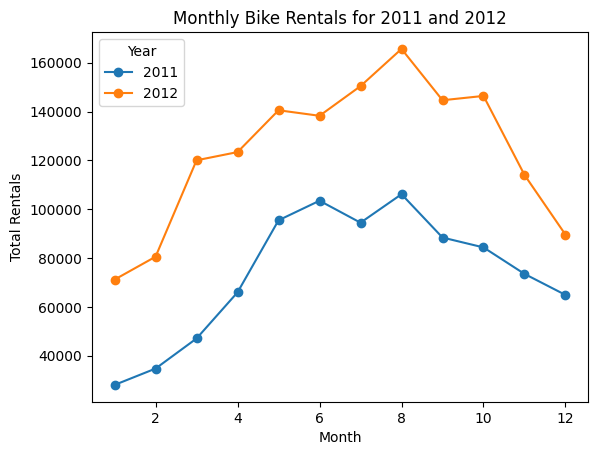

In [27]:
monthly_rentals = df_day.groupby([df_day['dteday'].dt.year.rename('Year'), df_day['dteday'].dt.month.rename('Month')])['cnt'].sum().reset_index()

pivot_df = monthly_rentals.pivot(index='Month', columns='Year', values='cnt')

pivot_df.plot(kind='line', marker='o')

plt.title('Monthly Bike Rentals for 2011 and 2012')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.legend(title='Year', loc='upper left')

plt.show()

### Berapakah jumlah penyewaan sepeda pada hari kerja dan hari libur?

Jumlah pengguna _bike sharing_ lebih banyak di hari kerja dibanding di hari libur.

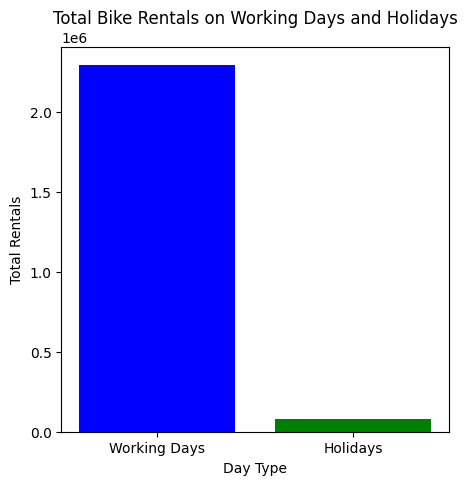

In [28]:
# Calculate total rentals for working days and holidays
total_rentals_working_days = df_day[df_day['workingday'] == 1]['cnt'].sum()
total_rentals_holidays = df_day[df_day['holiday'] == 1]['cnt'].sum()

# Prepare data for the bar graph
data = {'Working Days': total_rentals_working_days, 'Holidays': total_rentals_holidays}
names = list(data.keys())
values = list(data.values())

# Create bar graph
plt.figure(figsize=(5, 5))
plt.bar(names, values, color=['blue', 'green'])
plt.title('Total Bike Rentals on Working Days and Holidays')
plt.xlabel('Day Type')
plt.ylabel('Total Rentals')
plt.show()

### Pada jam berapa sepeda paling banyak disewa (kolom ‘hr’)?

Jumlah pengguna _bike sharing_ mengalami lonjakan signifikan pada jam 8 pagi dan jam 5 sore. Pada siang hari, jumlah pengguna bisa dikatakan stabil. Terlihat bahwa jumlah pengguna turun drastis pada larut malam.

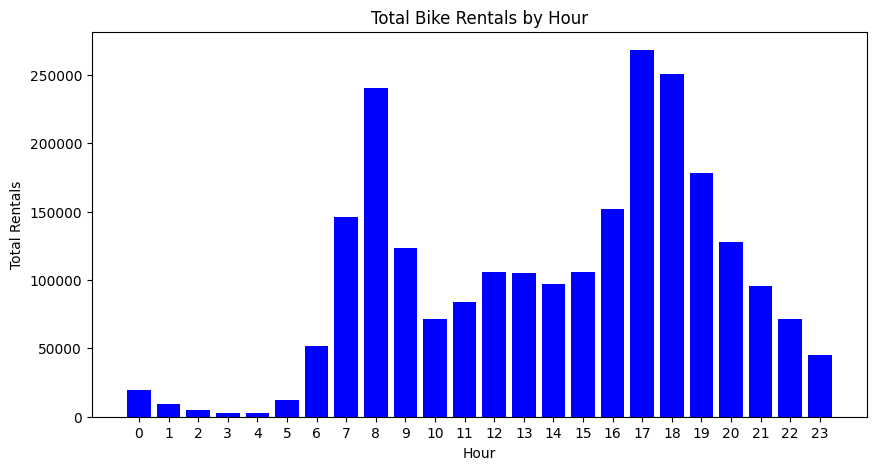

In [29]:
# Group by 'hr' and sum 'cnt'
hourly_rentals = df_hour.groupby('hr')['cnt'].sum()

plt.figure(figsize=(10, 5))
plt.bar(hourly_rentals.index, hourly_rentals.values, color='blue')

plt.title('Total Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.xticks(range(24))

plt.show()

## Conclusion

- Tren penggunaan bike sharing meningkat setiap bulan, mencapai puncaknya pada bulan Agustus dan menurun hingga Januari berikutnya. Jumlah pengguna pada tahun 2012 secara signifikan lebih tinggi daripada tahun sebelumnya.
- Jumlah pengguna bike sharing lebih banyak pada hari kerja daripada hari libur.
- Terjadi lonjakan penggunaan bike sharing pada jam 8 pagi dan 5 sore, stabil di siang hari, dan menurun drastis di larut malam.